# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [668]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [669]:
print("Для воспроизводимости результатов с учетом фиксирования случайности")

Для воспроизводимости результатов с учетом фиксирования случайности


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [670]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [671]:
np.random.seed(42)

df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [672]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [673]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [674]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [675]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [676]:
# Вывод названия колонок с пропусками
na_columns = df_train.isna().sum().loc[lambda x : x!=0].index.to_list()
na_columns

['mileage', 'engine', 'max_power', 'torque', 'seats']

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [677]:
features = df_train.drop('selling_price', axis=1).columns.to_list()
features

['name',
 'year',
 'km_driven',
 'fuel',
 'seller_type',
 'transmission',
 'owner',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'seats']

In [678]:
# Количество дубликатов
df_train[df_train[features].duplicated()].shape[0]

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [679]:
df_train[df_train[features].duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [680]:
df_train = df_train.drop_duplicates(features, keep='first').reset_index(drop=True)

In [681]:
df_train.shape

(5840, 13)

In [682]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

## Сделано выше!!!

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [683]:
df_train['mileage'] = df_train['mileage'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)
df_test['mileage'] = df_test['mileage'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)

df_train['engine'] = df_train['engine'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan )
df_test['engine'] = df_test['engine'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)

df_train['max_power'] = df_train['max_power'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)
df_test['max_power'] = df_test['max_power'].apply(lambda x: float(str(x).split()[0]) if len(str(x).split()) == 2 else np.nan)

In [684]:
def torque_cleaner(test_tor):
    l = []
    coeff_1 = 1
    dict_kgm_nm = {'kgm': 1, 'nm': 9.80665}
    str_test = ''
    for i in test_tor:
        i = i.lower()
        if i.isdigit() or i=='.':
            str_test += i
        if i.isdigit()==0 and i!='.' and str_test!='':
            l.append(float(str_test))
            str_test = ''
    for key in dict_kgm_nm.keys():
        if key in test_tor:
            coeff_1 = dict_kgm_nm[key]

    return [np.round(l[0]*coeff_1, 2), l[-1]]

In [685]:
df_train['torque_new'] = (df_train['torque'] +'@')\
                        .fillna('0.0@').replace(',', '', regex=True).apply(torque_cleaner)
df_test['torque_new'] = (df_test['torque'] +'@')\
                        .fillna('0.0@').replace(',', '', regex=True).apply(torque_cleaner)

In [686]:
df_train['torque'] = df_train['torque_new'].apply(lambda x: float(x[0])).replace(0.0, np.nan)
df_train['max_torque'] = df_train['torque_new'].apply(lambda x: float(x[1])).replace(0.0, np.nan)

df_test['torque'] = df_test['torque_new'].apply(lambda x: float(x[0])).replace(0.0, np.nan)
df_test['max_torque'] = df_test['torque_new'].apply(lambda x: float(x[1])).replace(0.0, np.nan)

In [687]:
df_train = df_train.drop('torque_new', axis=1)
df_test = df_test.drop('torque_new', axis=1)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [688]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          186
engine           186
max_power        187
torque           187
seats            186
max_torque       187
dtype: int64

In [585]:
na_columns

['mileage', 'engine', 'max_power', 'torque', 'seats']

In [689]:
na_columns.append('max_torque')

In [690]:
for col in na_columns:
    df_train[col] = df_train[col].fillna(df_train[col].median())
    df_test[col] = df_test[col].fillna(df_train[col].median())

In [691]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
max_torque       0
dtype: int64

In [692]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
max_torque       0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [693]:
print("Поскольку seats хоть и является числом, но не имеет свойств числа. К примеру, кол-во сидений ограничена в количестве,\
 врядли какая-то машина имеет 100 сидений, или же 0 сидений. Зато данная переменная является порядковой,\
 потому что мы можем сказать, что 5 сидений больше 3-х")

Поскольку seats хоть и является числом, но не имеет свойств числа. К примеру, кол-во сидений ограничена в количестве, врядли какая-то машина имеет 100 сидений, или же 0 сидений. Зато данная переменная является порядковой, потому что мы можем сказать, что 5 сидений больше 3-х


In [694]:
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

In [704]:
nums_features_with_target = nums_features + ['selling_price']

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


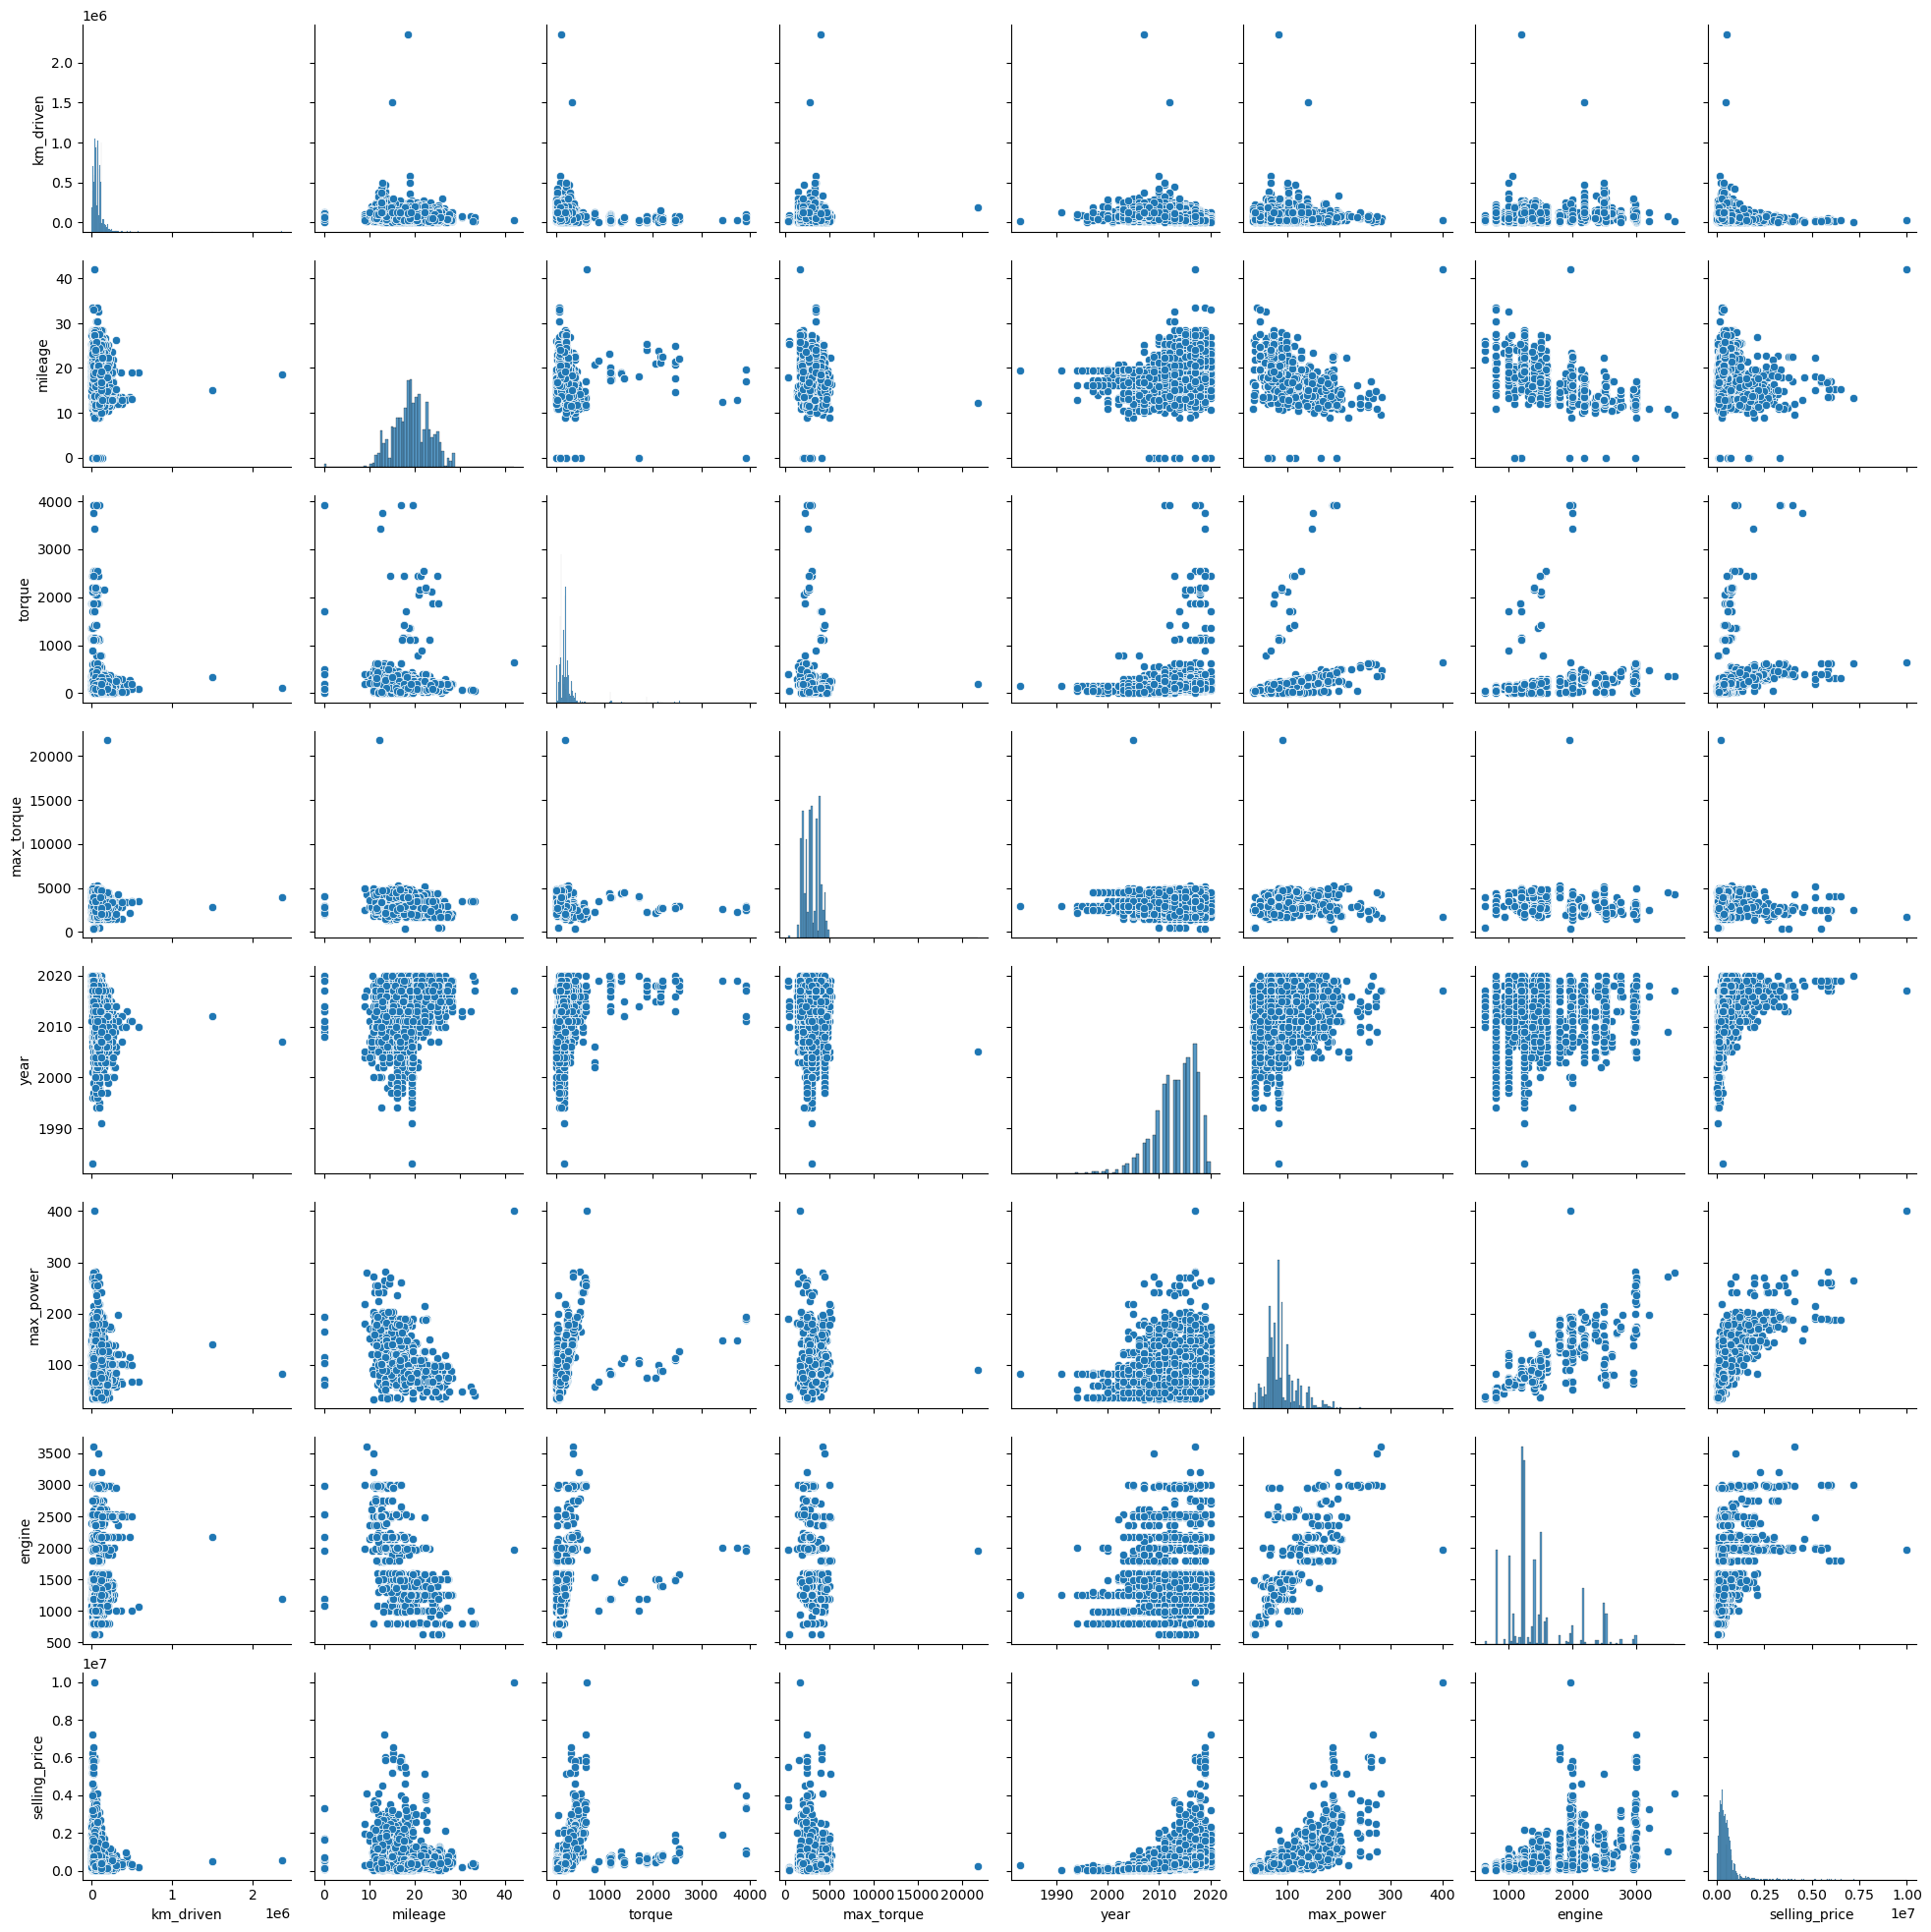

In [593]:
sns.pairplot(df_train[nums_features_with_target]);

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

* Не все признаки имеют четкую линейную связь с таргетом, но, судя по визуализации, max_power и engine имеют наиболее линейную связь с таргетом

* С определенного года наблюдается рост стоимости автомобиля, возможно по году следует исключить выбросы в будущем

* Количество сидений положительно влияет на стоимость машины примерно в диапазоне от 4 до 8 сидений(нелинейная связь)

max_power положительно скорелирован с признаком engine, при том, что оба признака имеют средне-высокую линейную связь с таргетом, что в последствии говорит о мультиколлинеарности, которая ведет к нестабильной работе модели на новых данных и переобучению

max_power слабо положительно скорелирован с годом выпуска авто

mileage отрицательно коррелирует с engine

В остальном многие признаки не имеют сильной корреляции, что не может не радовать(иначе проблемы с мультикорреляцией)

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


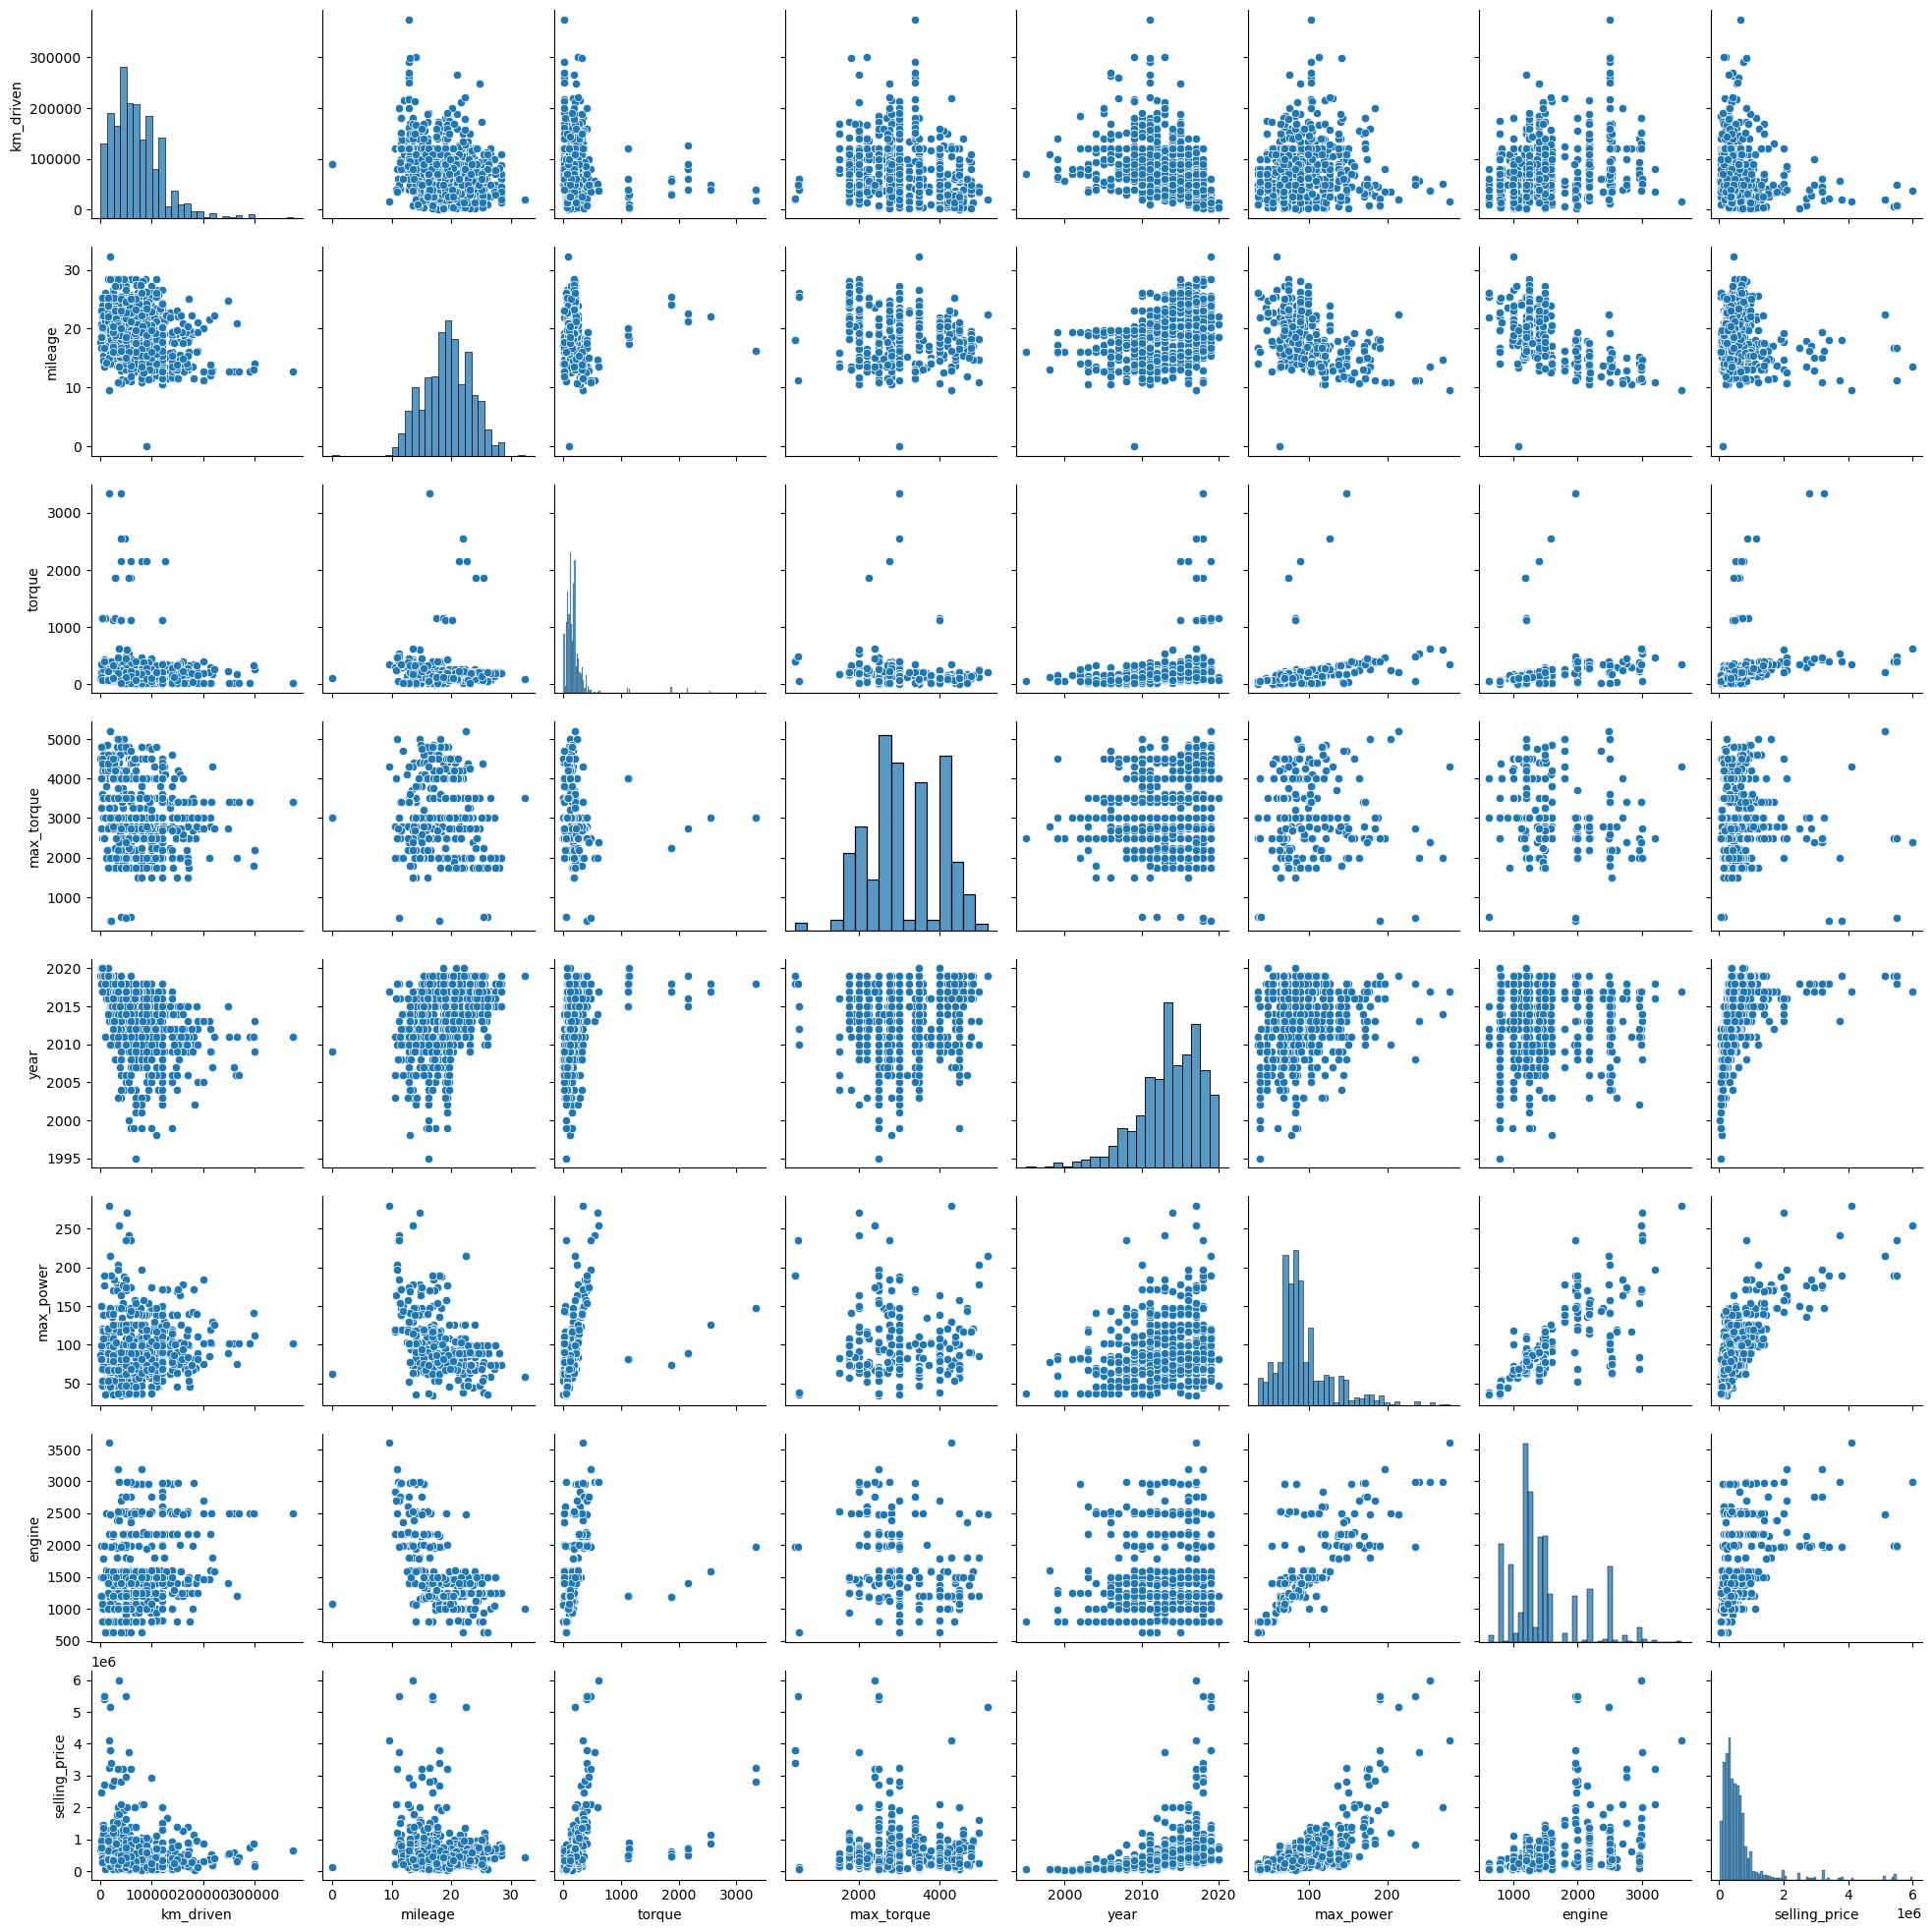

In [594]:
sns.pairplot(df_test[nums_features_with_target]);

в целом множества train и test похожи и особых **исключительных** признаков нет 

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

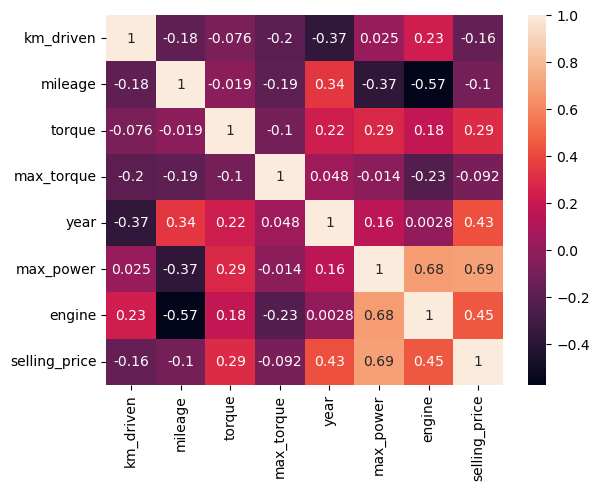

In [595]:
sns.heatmap(df_train[nums_features_with_target].corr(), annot=True);

In [695]:
min_abs_corr = np.min(abs(df_train[nums_features].corr()))
round(min_abs_corr, 5)

0.00282

In [696]:
df_train[nums_features].corr()[df_train[nums_features].corr()==min_abs_corr]

,km_driven,mileage,engine,max_power,torque,max_torque,year
km_driven,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine,NaN,NaN,NaN,NaN,NaN,NaN,0.002819
max_power,NaN,NaN,NaN,NaN,NaN,NaN,NaN
torque,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max_torque,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,NaN,NaN,0.002819,NaN,NaN,NaN,NaN


1. engine и year показали наименьшую корреляцию среди всех пар

2. max_power и engine с значением корреляции в 0.68, а также seats и engine с значением корреляции в 0.65. 

3. Согласно матрицы корреляции да, однако мы не можем быть уверены в том, что корреляция является статитистически значимой без проведения соответсвующего статистического теста

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

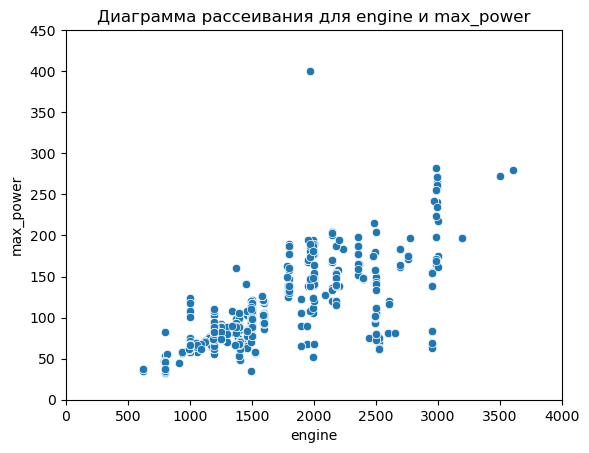

In [598]:
sns.scatterplot(data=df_train, x = 'engine', y = 'max_power')
plt.title('Диаграмма рассеивания для engine и max_power')
plt.ylim((0, 450));
plt.xlim((0, 4000));

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

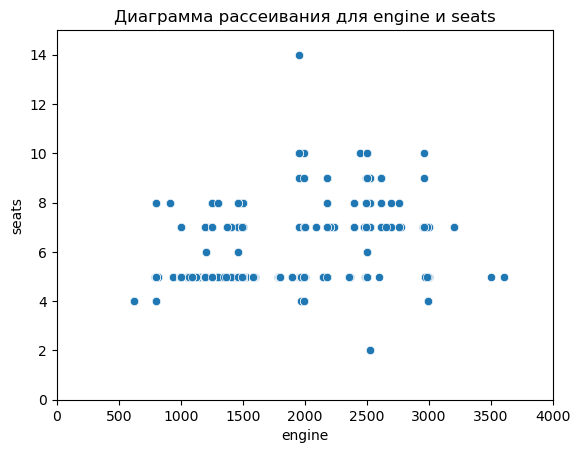

In [599]:
sns.scatterplot(data=df_train, x = 'engine', y = 'seats')
plt.title('Диаграмма рассеивания для engine и seats')
plt.ylim((0, 15));
plt.xlim((0, 4000));

У engine и seats также наблюдается средне-высокая корреляция, однако она действует до определенного значения engine, нужно более детально посмотреть на этот признак с ценой

In [706]:
df_train['selling_price_1000'] = df_train['selling_price']/1000

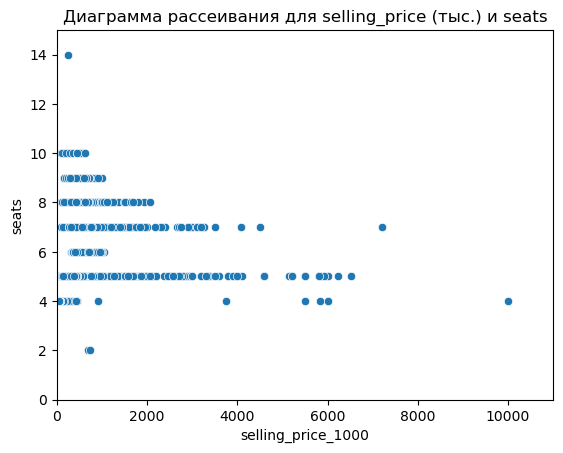

In [602]:
sns.scatterplot(data=df_train, x = 'selling_price_1000', y = 'seats')
plt.title('Диаграмма рассеивания для selling_price (тыс.) и seats')
plt.ylim((0, 15));
plt.xlim((0, 11000));

Чтобы получить наибольший вклад от переменной seats для нее необходимо сделать bining, поскольку очевидно, что данный признак имеет не совмем линейную связь с таргетом, а bining поможет сделать зависимость линейной

In [707]:
nums_features_with_target.append('selling_price_1000')

In [708]:
df_train['km_driven_100'] = df_train['km_driven']/100

In [709]:
nums_features_with_target

['km_driven',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'max_torque',
 'year',
 'selling_price',
 'selling_price_1000']

In [710]:
nums_features_with_target.remove('km_driven')
nums_features_with_target.append('km_driven_100')

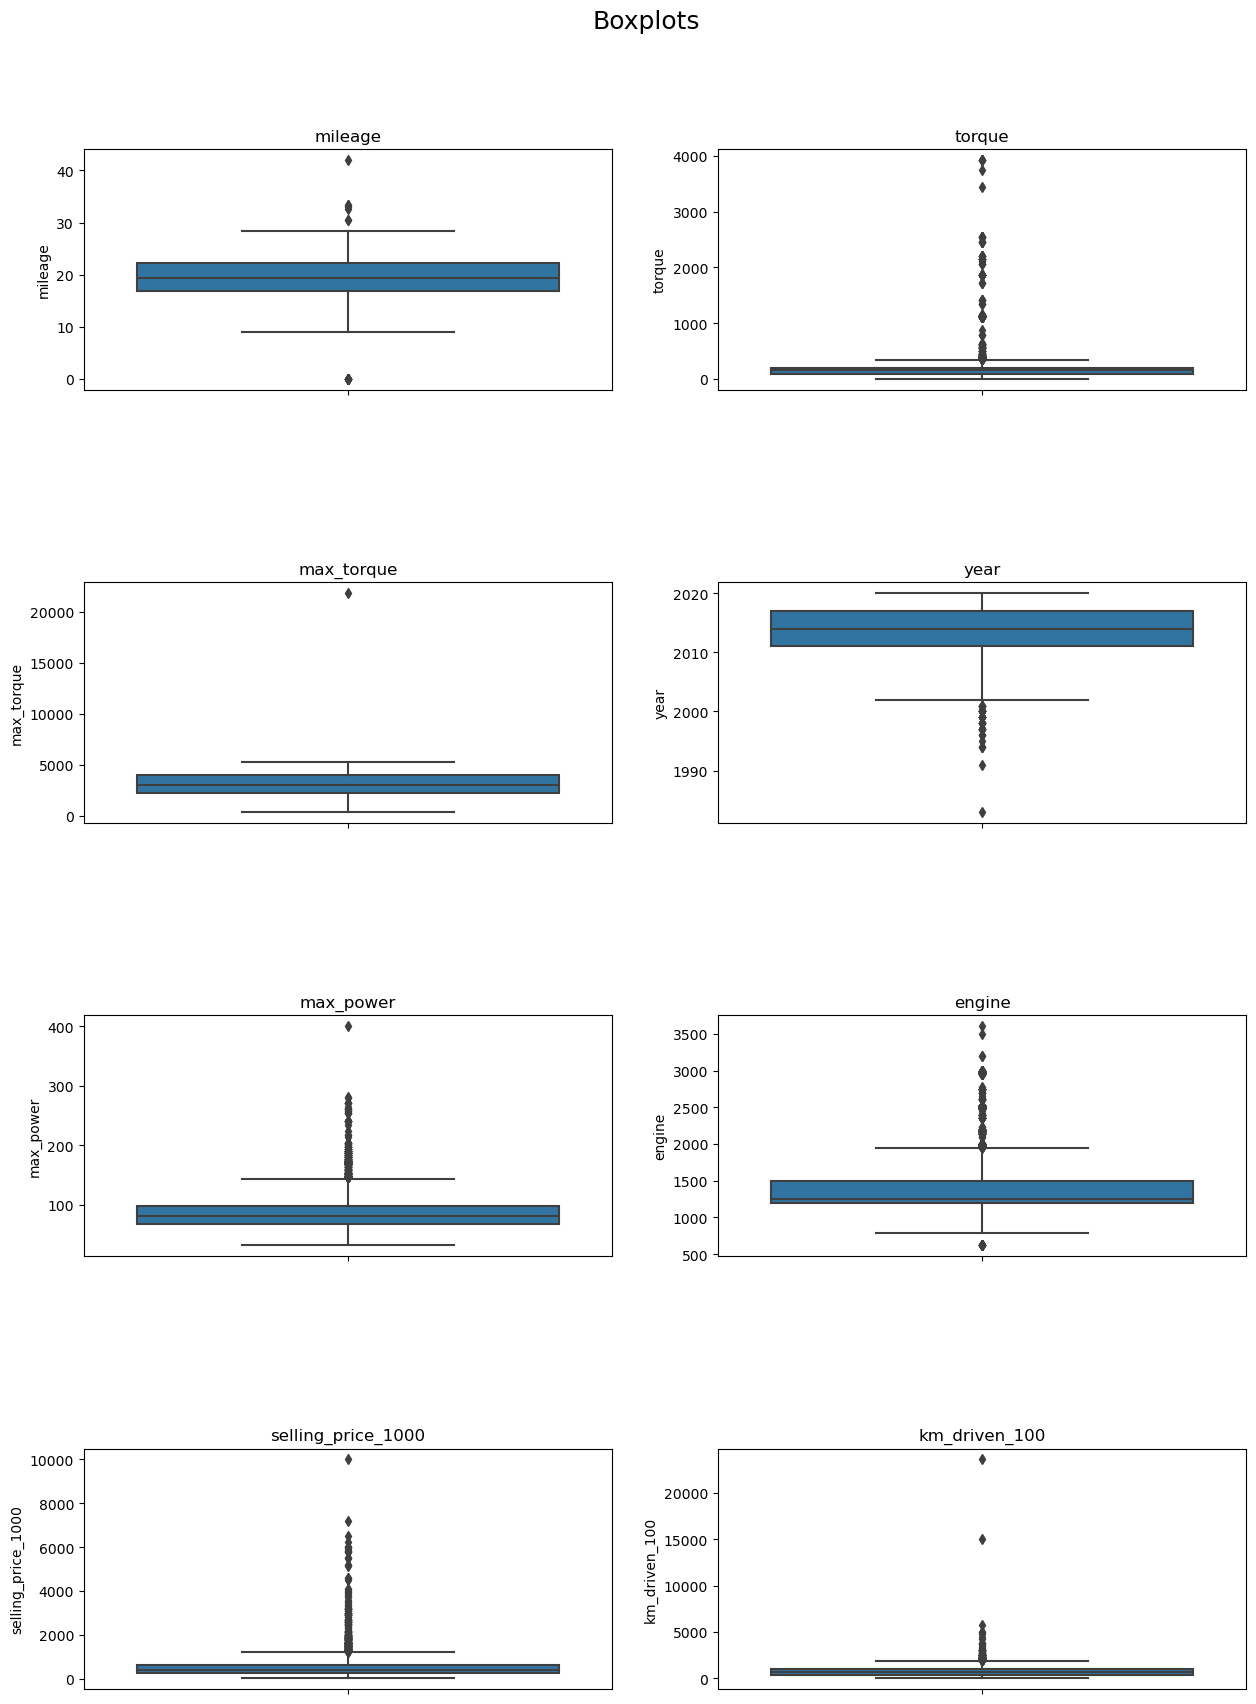

In [607]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
plt.subplots_adjust(hspace=0.8)
fig.suptitle("Boxplots", fontsize=18, y=0.95)

for feature, ax in zip(nums_features_with_target, axs.ravel()):
    
    sns.boxplot(data=df_train, y = feature, ax=ax)
    ax.set_title(feature)

Судя по ящикам с усами во многих признаках присутствуют выбросы, исключив которые можно улучшить качество модели

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [711]:
nums_features = df_train.columns[df_train.dtypes != 'object'].to_list()
nums_features.remove('selling_price')
nums_features.remove('selling_price_1000')
nums_features.remove('km_driven_100')

In [712]:
X_train = df_train[nums_features]
y_train = df_train['selling_price']

In [713]:
X_train.head()

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque
0,2014,145500,23.40,1248,74.00,190.00,5,2000.0
1,2014,120000,21.14,1498,103.52,250.00,5,2500.0
2,2010,127000,23.00,1396,90.00,22.40,5,2750.0
3,2007,120000,16.10,1298,88.20,11.50,5,4500.0
4,2017,45000,20.14,1197,81.86,1115.51,5,4000.0


Так как выполнил обработку дополнительно признака, то кол-во колонок = 8

In [714]:
assert X_train.shape == (5840, 8)

In [715]:
X_test = df_test[nums_features]
y_test = df_test['selling_price']

In [716]:
X_test

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque
0,2010,168000,14.00,2498,112.00,260.00,7,2200.0
1,2017,25000,21.50,1497,108.50,260.00,5,2750.0
2,2007,218463,12.90,1799,130.00,172.00,5,4300.0
3,2015,173000,25.10,1498,98.60,200.00,5,1750.0
4,2011,70000,16.50,1172,65.00,96.00,5,3000.0
...,...,...,...,...,...,...,...,...
995,2008,100000,19.81,1086,68.05,99.04,5,4500.0
996,2017,50000,18.60,1197,81.83,114.70,5,4000.0
997,2009,40000,23.00,1396,90.00,22.40,5,2750.0
998,2012,25000,20.36,1197,78.90,111.80,5,4000.0


In [717]:
assert X_test.shape == (1000, 8)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [718]:
def metrics_classif_model(model, X_train, y_train, X_test, y_test):
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    
    r2_train = r2_score(y_train, prediction_train)
    r2_test = r2_score(y_test, prediction_test)
    
    mse_train = MSE(y_train, prediction_train)
    mse_test = MSE(y_test, prediction_test)
    
    print(f"R2 Train: {np.round(r2_train, 2)}")
    print(f"R2 Test: {np.round(r2_test, 2)}", end = '\n\n')
    
    print(f"MSE Train: {int(np.round(mse_train))}")
    print(f"MSE Test: {int(np.round(mse_test))}")
    
    return r2_train, r2_test, mse_train, mse_test

In [719]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

np.random.seed(42)

lr = LinearRegression()

lr.fit(X_train, y_train)

metrics_classif_model(lr, X_train, y_train, X_test, y_test)

R2 Train: 0.6
R2 Test: 0.61

MSE Train: 113465370696
MSE Test: 226364291846


(0.6041514497117355, 0.6062055553337979, 113465370696.00644, 226364291845.9162)

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [720]:
from sklearn.preprocessing import StandardScaler

np.random.seed(42)

scaler = StandardScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

lr.fit(X_train_sc, y_train)

metrics_classif_model(lr, X_train_sc, y_train, X_test_sc, y_test)

R2 Train: 0.6
R2 Test: 0.61

MSE Train: 113465370696
MSE Test: 226364291846


(0.6041514497117377,
 0.6062055553337968,
 113465370696.00578,
 226364291845.91687)

Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [619]:
pd.Series(lr.coef_, X_train.columns).sort_values(key=abs)

mileage        -9450.375651
torque         13910.197378
engine         19493.075007
seats         -28138.293747
km_driven     -48512.980765
max_torque    -63183.335264
year          162927.964726
max_power     332147.080138
dtype: float64

Наиболее информативный признак, исходя из значений весов, max_power

Признак **max_power** получил наибольший вес w после обучения модели

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [721]:
from sklearn.linear_model import Lasso

lasso = Lasso(random_state=42)
lasso.fit(X_train_sc, y_train)
metrics_classif_model(lasso, X_train_sc, y_train, X_test_sc, y_test)

R2 Train: 0.6
R2 Test: 0.61

MSE Train: 113465370710
MSE Test: 226365110378


(0.6041514496642288,
 0.6062041313757751,
 113465370709.62366,
 226365110377.64975)

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [722]:
pd.Series(lasso.coef_, X_train.columns).sort_values(key=abs)

mileage        -9447.132406
torque         13909.875678
engine         19490.919356
seats         -28134.365662
km_driven     -48512.065161
max_torque    -63181.196584
year          162925.836717
max_power     332148.238858
dtype: float64

Нет, потому что коэффициент регулиризации слишком низкий для того, чтобы занулить веса подобных величин

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [723]:
from sklearn.model_selection import GridSearchCV

In [724]:
%%time
params = {'alpha': [0.1, 1, 10, 100, 1000, 10000, 100000]}
gs = GridSearchCV(Lasso(), params,cv=10, scoring='r2', verbose=True)

gs.fit(X_train_sc, y_train)

print(gs.best_score_)
print(gs.best_params_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
0.5826974208796034
{'alpha': 10000}
CPU times: total: 250 ms
Wall time: 1.28 s


In [725]:
pd.Series(gs.best_estimator_.coef_, X_train.columns).sort_values(key=abs)

mileage            0.000000
engine             0.000000
seats           -108.862062
torque         10061.780145
km_driven     -39304.164854
max_torque    -48503.711739
year          151701.982896
max_power     334987.705548
dtype: float64

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

70 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

У лучшей модели коэффициент регулиризации = 10000. Регуляризация занулила признаки mileage и engine

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [727]:
from sklearn.linear_model import ElasticNet

In [728]:
%%time
params = {'alpha': [10, 100, 1000, 10000],
         'max_iter':[100000], 'l1_ratio': np.arange(0, 1.1, 0.2)}
gs = GridSearchCV(ElasticNet(), params, cv=10, scoring='r2', verbose=True)

gs.fit(X_train_sc, y_train)

print(gs.best_score_)
print(gs.best_params_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.967e+14, tolerance: 1.521e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.024e+14, tolerance: 1.535e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inst

D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.669e+14, tolerance: 1.535e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.984e+14, tolerance: 1.599e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV inst

D:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.535e+14, tolerance: 1.507e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


0.5826974208796034
{'alpha': 10000, 'l1_ratio': 1.0, 'max_iter': 100000}
CPU times: total: 10min 48s
Wall time: 3h 58min 23s


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

{'alpha': 10000, 'l1_ratio': 1.0, 'max_iter': 100000}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [729]:
df_train = df_train.drop(['selling_price_1000', 'km_driven_100'], axis=1)

In [730]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)
X_test_cat = df_test.drop(['name', 'selling_price'], axis=1)

In [731]:
cat_cols = df_train.columns[df_train.dtypes == 'object'].to_list()
cat_cols.remove('name')
cat_cols.append('seats')

In [732]:
nums_features.remove('seats')

In [733]:
assert X_train_cat.shape == (5840, 12)

In [734]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [735]:
def feature_transform(df_train, df_test, nums_features, cat_cols=cat_cols):
    y_train = df_train['selling_price']
    y_test = df_test['selling_price']
    
    X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)
    X_test_cat = df_test.drop(['name', 'selling_price'], axis=1)
    
    OHE = OneHotEncoder(drop='first', handle_unknown='ignore')
    X_train_cat_feat = pd.DataFrame(OHE.fit_transform(X_train_cat[cat_cols]).toarray())
    X_test_cat_feat = pd.DataFrame(OHE.transform(X_test_cat[cat_cols]).toarray())

    X_train_cat_feat.columns = X_train_cat_feat.columns.astype(str)
    X_test_cat_feat.columns = X_test_cat_feat.columns.astype(str)

    X_train = pd.DataFrame(scaler.fit_transform(X_train_cat[nums_features]), columns = nums_features)
    X_test = pd.DataFrame(scaler.transform(X_test_cat[nums_features]), columns = nums_features)
    
    X_train = pd.concat([X_train, X_train_cat_feat], axis=1)
    X_test = pd.concat([X_test, X_test_cat_feat], axis=1)
    
    return X_train, X_test, y_train, y_test

In [736]:
X_train, X_test, y_train, y_test = feature_transform(df_train, df_test, nums_features)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [737]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

params={'alpha': [10, 100, 1000, 10000, 1000000]}

grid_rid = GridSearchCV(Ridge(), params, cv=10, scoring='r2', verbose=1)
grid_rid.fit(X_train, y_train)

print(grid_rid.best_score_)
print(grid_rid.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
0.6266924454002376
{'alpha': 10}


In [738]:
metrics_classif_model(grid_rid, X_train, y_train, X_test, y_test)

R2 Train: 0.66
R2 Test: 0.66

MSE Train: 97180511931
MSE Test: 197472807143


(0.6609647108359135, 0.6564666017262838, 97180511930.67935, 197472807143.24677)

Качество предсказаний улучшилось до ~0.63 r2_score

# Часть 4 - бонусная (1.5 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [739]:
df_train['year_sq'] = df_train['year']**2
df_test['year_sq'] = df_test['year']**2

In [740]:
df_train[['year_sq', 'year']].corr()

,year_sq,year
year_sq,1.000000,0.999999
year,0.999999,1.000000


Признаки имеют высокую корреляцию, что ухудшает качество итоговой модели. Следовательно необходимо оставить один из признаков

In [741]:
nums_features.remove('year')
nums_features.append('year_sq')

X_train, X_test, y_train, y_yest = feature_transform(df_train, df_test, nums_features)

In [742]:
np.random.seed(42)

params={'alpha': [10, 100, 1000, 10000, 1000000]}

grid_rid = GridSearchCV(Ridge(), params, cv=10, scoring='r2', verbose=1)
grid_rid.fit(X_train, y_train)

print(grid_rid.best_score_)
print(grid_rid.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
0.6268403643341929
{'alpha': 10}


Возведение года в квадрат не привнесло значительных улучшений моделей => не используем данные метод преобразования переменной года

In [743]:
nums_features.remove('year_sq')
nums_features.append('year')

Попробуем свести engine и max_power к одному признаку, у них довольно высокая корреляция, что в последствии идет только в минус модели, хотя при этом данные признаки в наибольшей степени коррелируют с таргетом 

In [744]:
df_train['max_power_engine'] = df_train['max_power']/df_train['engine']
df_test['max_power_engine'] = df_test['max_power']/df_test['engine']

In [745]:
df_train[['max_power_engine', 'max_power', 'engine']].corr()

,max_power_engine,max_power,engine
max_power_engine,1.000000,0.480691,-0.279974
max_power,0.480691,1.000000,0.681968
engine,-0.279974,0.681968,1.000000


In [746]:
nums_features.append('max_power_engine')

X_train, X_test, y_train, y_test = feature_transform(df_train, df_test, nums_features)

np.random.seed(42)

params={'alpha': [10, 100, 1000, 10000, 1000000]}

grid_rid = GridSearchCV(Ridge(), params, cv=10, scoring='r2', verbose=1)
grid_rid.fit(X_train, y_train)

print(grid_rid.best_score_)
print(grid_rid.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
0.6298928059494312
{'alpha': 10}


Качество модели незначительно улучшилось. Поскольку добавление параметра усложняет модель, то скорее не стоит использовать данную переменную в итоговой модели

In [747]:
nums_features.remove('max_power_engine')

Объединим Trustmark Dealer с Dealer в столбце seller_type, поскольку по смыслу категории похожи, при этом в Trustmark Dealer мало значений

In [748]:
df_train['seller_type_new'] = df_train.seller_type.apply(lambda x: 'Dealer' if 'Dealer' in x else x)
df_test['seller_type_new'] = df_test.seller_type.apply(lambda x: 'Dealer' if 'Dealer' in x else x)

Аналогично можно поступить с fuel, можно объединить категории CNG и LPG. Ведь машины не на бензине редкость

In [749]:
df_train.fuel.value_counts()

fuel
Diesel    3177
Petrol    2579
CNG         50
LPG         34
Name: count, dtype: int64

Топливо CNG и LPG не часто можно встретить в обычный машинах. Поскольку легкие машины на природном газе или на сниженном углеводородном редкость, то можем в принципе удалить эти признаки

In [750]:
df_train['fuel_new'] = df_train.fuel.apply(lambda x: 'Alternative' if x in ['CNG', 'LPG'] else x)
df_test['fuel_new'] = df_test.fuel.apply(lambda x: 'Alternative' if x in ['CNG', 'LPG'] else x)

In [752]:
df_train.owner.value_counts()

owner
First Owner             3603
Second Owner            1639
Third Owner              454
Fourth & Above Owner     140
Test Drive Car             4
Name: count, dtype: int64

Test Drive Car по смыслу ближе к категории первого владельца, ведь машина еще не имеет внушительный пробег, чтобы просесть в цен. Также можно попробовать объединить категории 3-ий владелец, а а также 4 и больше, поскольку наблюдений, попадающих в данную категорию мало, а данная история владения может негативно сказаться на цене

In [753]:
df_train['owner_new'] = df_train.owner.apply(lambda x: 'Third Owner' if 'Fourth & Above Owner' in x else x)\
                     .replace('Third Owner', 'Third & Above Owner')\
                     .replace('Test Drive Car', 'First Owner')

df_test['owner_new'] = df_test.owner.apply(lambda x: 'Third Owner' if 'Fourth & Above Owner' in x else x)\
                     .replace('Third Owner', 'Third & Above Owner')\
                     .replace('Test Drive Car', 'First Owner')

In [754]:
cat_cols.remove('seller_type')
cat_cols.append('seller_type_new')

cat_cols.remove('fuel')
cat_cols.append('fuel_new')

cat_cols.remove('owner')
cat_cols.append('owner_new')

In [755]:
X_train, X_test, y_train, y_test = feature_transform(df_train, df_test, nums_features, cat_cols)

In [756]:
np.random.seed(42)

params={'alpha': [10, 100, 1000, 10000, 1000000]}

grid_rid = GridSearchCV(Ridge(), params, cv=10, scoring='r2', verbose=1)
grid_rid.fit(X_train, y_train)

print(grid_rid.best_score_)
print(grid_rid.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
0.6253867209392588
{'alpha': 10}


Качество модели ухудшилось => оставляем признаки в своем прошлом виде

In [757]:
cat_cols.remove('seller_type_new')
cat_cols.append('seller_type')

cat_cols.remove('fuel_new')
cat_cols.append('fuel')

cat_cols.remove('owner_new')
cat_cols.append('owner')

In [758]:
import scipy.stats as stats

In [759]:
def count_out(data, col):
    data = data[col]
    Q1 = data.quantile(q=.25)
    Q3 = data.quantile(q=.75)
    IQR = stats.iqr(data)
    cnt_out = out_test[(data>Q1+3*IQR) | (data<Q1-3*IQR)].count()
    return (col, cnt_out)

In [760]:
out_list = []
for num_col in df_train[nums_features+['selling_price']]:
    out_list.append(count_out(df_train, num_col))

In [761]:
out_list

[('km_driven', 67),
 ('mileage', 17),
 ('engine', 846),
 ('max_power', 221),
 ('torque', 224),
 ('max_torque', 1),
 ('year', 2),
 ('selling_price', 231)]

Попробуем убрать выбросы из года и таргета

<Axes: >

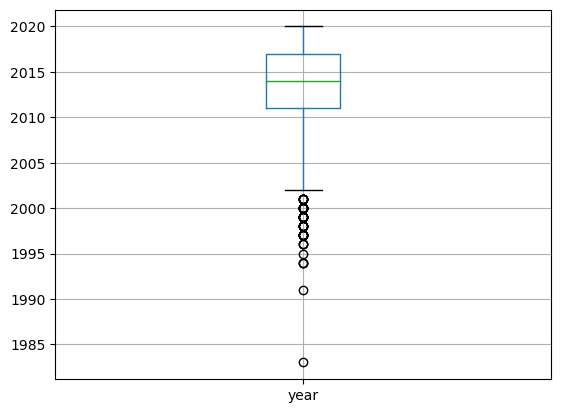

In [762]:
df_train.boxplot(column=['year'])

In [772]:
df_train['selling_price_1000'] = df_train['selling_price'] / 1000

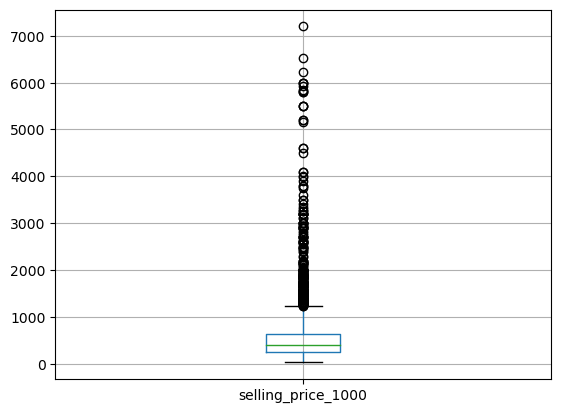

In [773]:
df_train.boxplot(column=['selling_price_1000']);

In [774]:
df_train = df_train[df_train.year>=1990].reset_index(drop=True)

In [777]:
df_train = df_train[df_train.selling_price_1000<6000].reset_index(drop=True)
df_train = df_train.drop('selling_price_1000', axis=1)

In [778]:
X_train, X_test, y_train, y_test = feature_transform(df_train, df_test, nums_features, cat_cols)

In [779]:
params={'alpha': [10, 100, 1000, 10000, 1000000]}

grid_rid = GridSearchCV(Ridge(), params, cv=10, scoring='r2', verbose=1)
grid_rid.fit(X_train, y_train)

print(grid_rid.best_score_)
print(grid_rid.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
0.6430851386490944
{'alpha': 10}


В среднем метрика увеличилась => модель немного, но улучшилась. Так что работа с выбросами пока дает свои плоды. Стоит обратить внимание на признак engine, где довольно много выбросов => можно попробовать очистить данные от строк с выбросами по engine

In [782]:
def count_out_with_cut(data, col):
    data = data[col]
    Q1 = data.quantile(q=.25)
    Q3 = data.quantile(q=.75)
    IQR = stats.iqr(data)
    cnt_out = data[(data>Q1+3*IQR) | (data<Q1-3*IQR)].count()
    return (col, cnt_out, Q1+3*IQR, Q1-3*IQR)

In [784]:
out_list = []
for num_col in df_train[nums_features+['selling_price']]:
    out_list.append(count_out_with_cut(df_train, num_col))
out_list

[('km_driven', 67, 222000.0, -144000.0),
 ('mileage', 17, 32.995, 0.9250000000000043),
 ('engine', 842, 2100.0, 294.0),
 ('max_power', 214, 161.0, -25.0),
 ('torque', 219, 401.92, -203.83999999999997),
 ('max_torque', 1, 7500.0, -3000.0),
 ('year', 1, 2029.0, 1993.0),
 ('selling_price', 224, 1405000.0, -905000.0)]

Для engine 842 выбросов. К сожалению, если избавиться от всех, то мы уберем большое число строк данных, что помешает модели точно прогнозировать. Можно попробовать увеличить коэффициент перед IQR

In [785]:
def count_out_with_cut(data, col, coeff):
    data = data[col]
    Q1 = data.quantile(q=.25)
    Q3 = data.quantile(q=.75)
    IQR = stats.iqr(data)
    cnt_out = data[(data>Q1+coeff*IQR) | (data<Q1-coeff*IQR)].count()
    return (col, cnt_out, Q1+coeff*IQR, Q1-coeff*IQR)

In [797]:
count_out_with_cut(df_train, 'engine', 4)

('engine', 484, 2401.0, -7.0)

In [798]:
X_train, X_test, y_train, y_test = feature_transform(df_train[df_train.engine<2400], 
                                                     df_test, nums_features, cat_cols)

np.random.seed(42)

params={'alpha': [10, 100, 1000, 10000, 1000000]}

grid_rid = GridSearchCV(Ridge(), params, cv=10, scoring='r2', verbose=1)
grid_rid.fit(X_train, y_train)

print(grid_rid.best_score_)
print(grid_rid.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
0.6391191129456989
{'alpha': 10}


Качество модели ухудшилось, что говорит о том, что для engine не имеет смысла обрабатывать выбросы

## Сохранение лучшей модели

In [805]:
def feature_transform_ohe(df_train, df_test, nums_features, cat_cols=cat_cols):
    y_train = df_train['selling_price']
    y_test = df_test['selling_price']
    
    X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)
    X_test_cat = df_test.drop(['name', 'selling_price'], axis=1)
    
    OHE = OneHotEncoder(drop='first', handle_unknown='ignore')
    X_train_cat_feat = pd.DataFrame(OHE.fit_transform(X_train_cat[cat_cols]).toarray())
    X_test_cat_feat = pd.DataFrame(OHE.transform(X_test_cat[cat_cols]).toarray())

    X_train_cat_feat.columns = X_train_cat_feat.columns.astype(str)
    X_test_cat_feat.columns = X_test_cat_feat.columns.astype(str)

    X_train = pd.DataFrame(scaler.fit_transform(X_train_cat[nums_features]), columns = nums_features)
    X_test = pd.DataFrame(scaler.transform(X_test_cat[nums_features]), columns = nums_features)
    
    X_train = pd.concat([X_train, X_train_cat_feat], axis=1)
    X_test = pd.concat([X_test, X_test_cat_feat], axis=1)
    
    return X_train, X_test, y_train, y_test, OHE

In [806]:
X_train, X_test, y_train, y_test, OHE = feature_transform_ohe(df_train, df_test, nums_features, cat_cols)

params={'alpha': [10, 100, 1000, 10000, 1000000]}

grid_rid = GridSearchCV(Ridge(), params, cv=10, scoring='r2', verbose=1)
grid_rid.fit(X_train, y_train)

print(grid_rid.best_score_)
print(grid_rid.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
0.6430851386490944
{'alpha': 10}


In [811]:
import pickle

data = {
     'best_model': grid_rid.best_estimator_,
     'intercept': grid_rid.best_estimator_.intercept_,
     'coef_model': grid_rid.best_estimator_.coef_,
     'scaler': scaler,
     'ohe': OHE
 }

with open('best_model.pickle', 'wb') as f:
    pickle.dump(data, f)

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [808]:
def business_metrics(y_true, y_pred):
    diff_abs = abs(y_pred-y_true)/y_true 
    return np.sum(diff_abs<=0.1)/len(y_true)

business_metrics(y_test, grid_rid.predict(X_test))

0.232

In [810]:
grid_rid.best_estimator_.intercept_

934037.5309291524

In [812]:
pd.read_pickle('best_model.pickle')

{'best_model': Ridge(alpha=10),
 'intercept': 934037.5309291524,
 'coef_model': array([ -29006.98472766,     424.20228505,   37878.69152475,
         249331.22834877,   11940.482487  ,  -59403.0531808 ,
         156307.68346197, -278044.25096153,  298579.44204036,
         -26248.5018136 , -111465.90081708,  -35245.28889391,
          -2845.79713559,  -59276.8715559 ,  -31540.96892139,
         -20148.46455779, -105931.01112089,  -73181.91129372,
         -33498.96110002,  107375.26800584,  -20706.67755214,
         -40930.28861998,  -54716.41607806,  377855.09447166,
         -44357.37967522]),
 'scaler': StandardScaler(),
 'ohe': OneHotEncoder(drop='first', handle_unknown='ignore')}

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link